In [9]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetV2M
from tensorflow.keras.applications.efficientnet_v2 import preprocess_input
from tensorflow.keras.models import load_model
from PIL import Image


In [6]:
train_dir = 'train_data'
test_dir = 'test_data'

In [34]:
loaded_model = load_model('EffV2-20Epoch-600-Trained100-16Batch.keras')

In [15]:
df = pd.read_csv('q1_submission_Final.csv')

In [11]:
for filename in os.listdir(test_dir):
    if filename.endswith(".jpg"):  # Adjust the file extension as needed
        # Open the image
        img = Image.open(os.path.join(test_dir, filename))

        # Resize the image to 600x600
        resized_img = img.resize((600, 600))

        # Save the resized image to the output directory
        resized_img.save(os.path.join('test_data_resized', filename))

In [46]:
test_datagen = ImageDataGenerator(
    preprocessing_function = preprocess_input
)
test_generator = test_datagen.flow_from_directory(
    'test_data',
    target_size=(600, 600),
    batch_size=1,  # Set batch_size to 1 for prediction on a single image at a time
    class_mode=None,  # Set to None since there are no labels
    shuffle=False  # Do not shuffle the data
    ,classes=['.']
)

Found 4000 images belonging to 1 classes.


In [12]:
Ftest = 'test_data_resized'

In [13]:
pics = os.listdir(Ftest)

In [90]:
a = mpimg.imread(Ftest+"/"+pics[2])

In [91]:
a = preprocess_input(a)

In [92]:
a = np.expand_dims(a, axis=0)

In [93]:
prediction = loaded_model.predict(a)

1/1 [==============================] - 0s 41ms/step


In [94]:
np.argmax(prediction) +1 

3

In [67]:
predictions = loaded_model.predict(test_generator)

4000/4000 [==============================] - 92s 23ms/step


In [76]:
Tpreds = np.argmax(predictions , axis=1)

In [77]:
Final_preds = Tpreds + 1 

In [95]:
df_predictions = pd.DataFrame({
    'name': [test_generator.filenames[i][2:] for i in range(len(test_generator.filenames))] ,
    'predicted': [Final_preds[i] for i in range(len((Final_preds)))]
})
csv_filename = 'q1_submission_Final2.csv'
df_predictions.to_csv(csv_filename, index=False)

In [72]:
df_predictions[]

,name,predicted
0,0009e12a0edb16b231b73e501366209662a51363_16140...,8
1,00180e2358a45e3028e993b43e483eeee105e127_16284...,7
2,0037909953100cdd2c03a30084fa3876e5579212_16151...,3
3,006321aee302c253b9b4922138f879508d48f77e_16241...,1
4,0067178f7669828b3439d0888795b1f3225a7df2_16289...,1
...,...,...
3995,ffac0874d22903dadba619aea38393f77ce6cac6_16277...,7
3996,ffbe06e96778ca2a0a3f5c56961304bc2d6ddb49_16258...,5
3997,ffc3f6f05c6da8c4970334083f03d453f5cddfbb_16242...,8
3998,ffe163763cbd2674e940dcf77af1863174c59dc5_16304...,9


In [79]:
df2 = pd.read_csv('q1_submission.csv')

In [81]:
(df['predicted'] != df_predictions['predicted']).sum()

3611

In [112]:
# df1s = df_predictions[df_predictions['predicted']== 5]

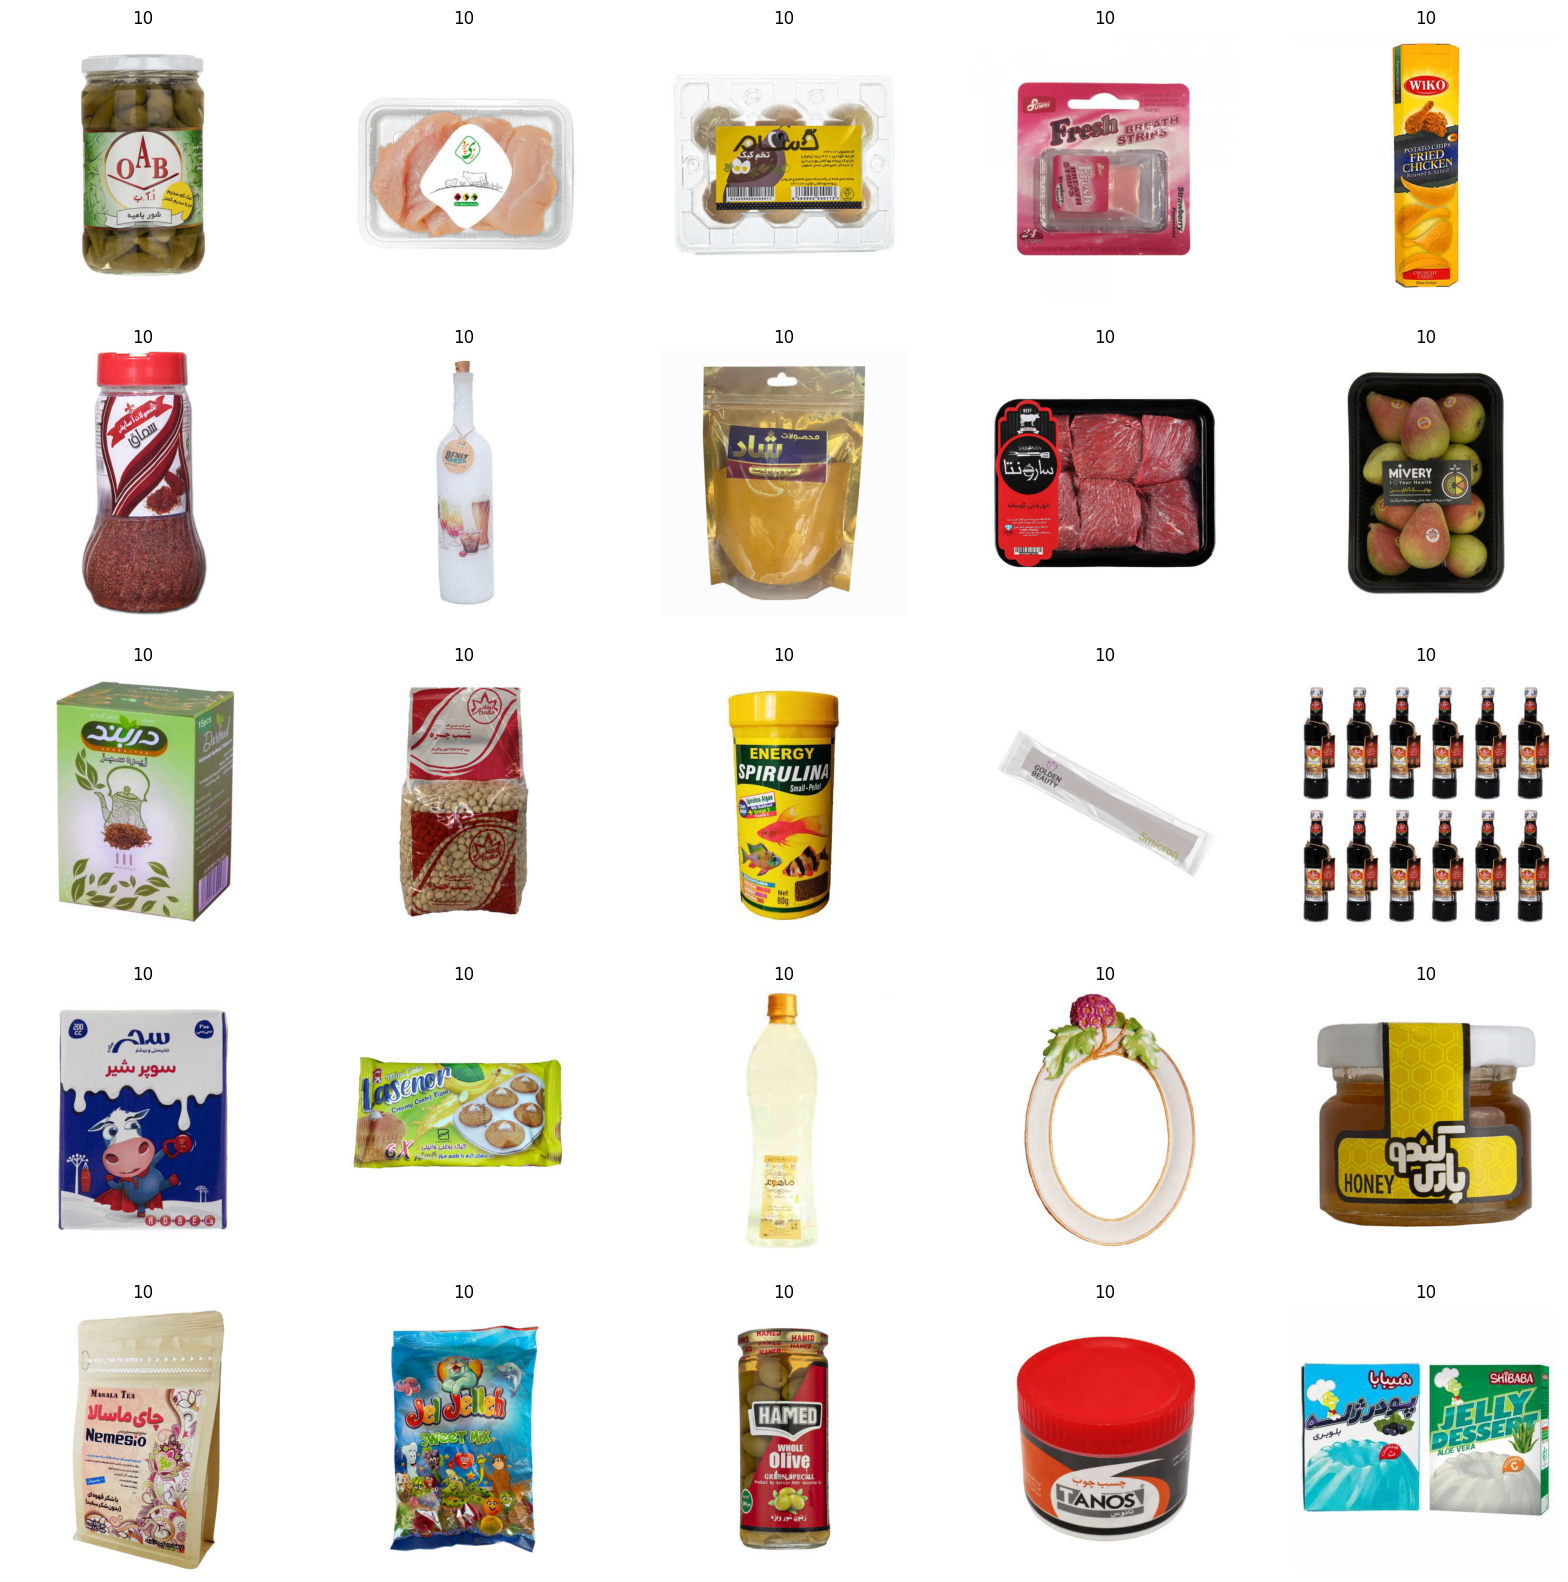

In [116]:
df1s = df_predictions[df_predictions['predicted']== 10]
fig , axes = plt.subplots(5, 5 , figsize=(20, 20))
axes = axes.flatten()
for i in range(25):
    img = plt.imread(f'{test_dir}/{df1s.iloc[i, 0]}')
    axes[i].imshow(img)
    axes[i].set_title(df1s.iloc[i, 1])
    axes[i].axis('off')